Develop a machine learning model that can accurately predict the price of a car based on various features and attributes. The model will take into account factors such as the car's make, model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, and other relevant features.
By leveraging machine learning algorithms and historical car sales data, build a predictive model that can provide accurate and reliable price estimates for used cars.

Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso,LogisticRegression

Reading data file

In [2]:
data=pd.read_csv('data_car.csv')

Printing the data (5 rows)

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Checking the size of dataset

In [4]:
data.shape

(11914, 16)

Contains 16 columns and 11914 rows

Checking the info about data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

8 columns are of object type, 5 columns are of integer type and 3 columns are of float type

Describing the data (Numerical)

In [6]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Dataset contains info on cars from 1990 to 2015. Number of cylinders is from 0 which is for electric vehicles and maximum nuber of cylinders is 4.

In [7]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

Chechking null values

In [8]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Only 3 columns are having null values. Market category is having the most number of null values

Treating the missing values and replacing by Mean for numerical and Mode for Categorical

In [9]:
data['Engine HP'].fillna(data['Engine HP'].mean(), inplace = True)
data['Engine Cylinders'].fillna(data['Engine Cylinders'].median(), inplace = True)
data['Market Category'].fillna(data['Market Category'].mode()[0], inplace = True)
data['Number of Doors'].fillna(data['Number of Doors'].median(), inplace = True)

Checking for dupicate values

In [10]:
data.duplicated().sum()

715

Dropping the duplicate values

In [11]:
data=data.drop_duplicates()

In [12]:
data.shape

(11199, 16)

There are 715 rows which are duplicate values.

Finding the number of unique values in each object columns

In [13]:
for i in data.select_dtypes(include='object'):
  print(i,' ',data[i].nunique())

Make   48
Model   915
Engine Fuel Type   10
Transmission Type   5
Driven_Wheels   4
Market Category   71
Vehicle Size   3
Vehicle Style   16


In [14]:
for i in ['Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size']:
  print(i,'\n',data[i].value_counts())
  print('\n')

Engine Fuel Type 
 regular unleaded                                6658
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64


Transmission Type 
 AUTOMATIC           7932
MANUAL              2634
AUTOMATED_MANUAL     553
DIRECT_DRIVE          68
UNKNOWN               12
Name: Transmission Type, dtype: int64


Driven_Wheels 
 front wheel drive    4354
rear wheel drive     3212
all wheel drive      2308
four wheel drive     1325
Name: Driven_Wheels, dtype: int64


Vehicle Size 
 Compact    4395
Midsize    4121
Large      2683
Name: Ve

Checking the distribution based on the Transmission type

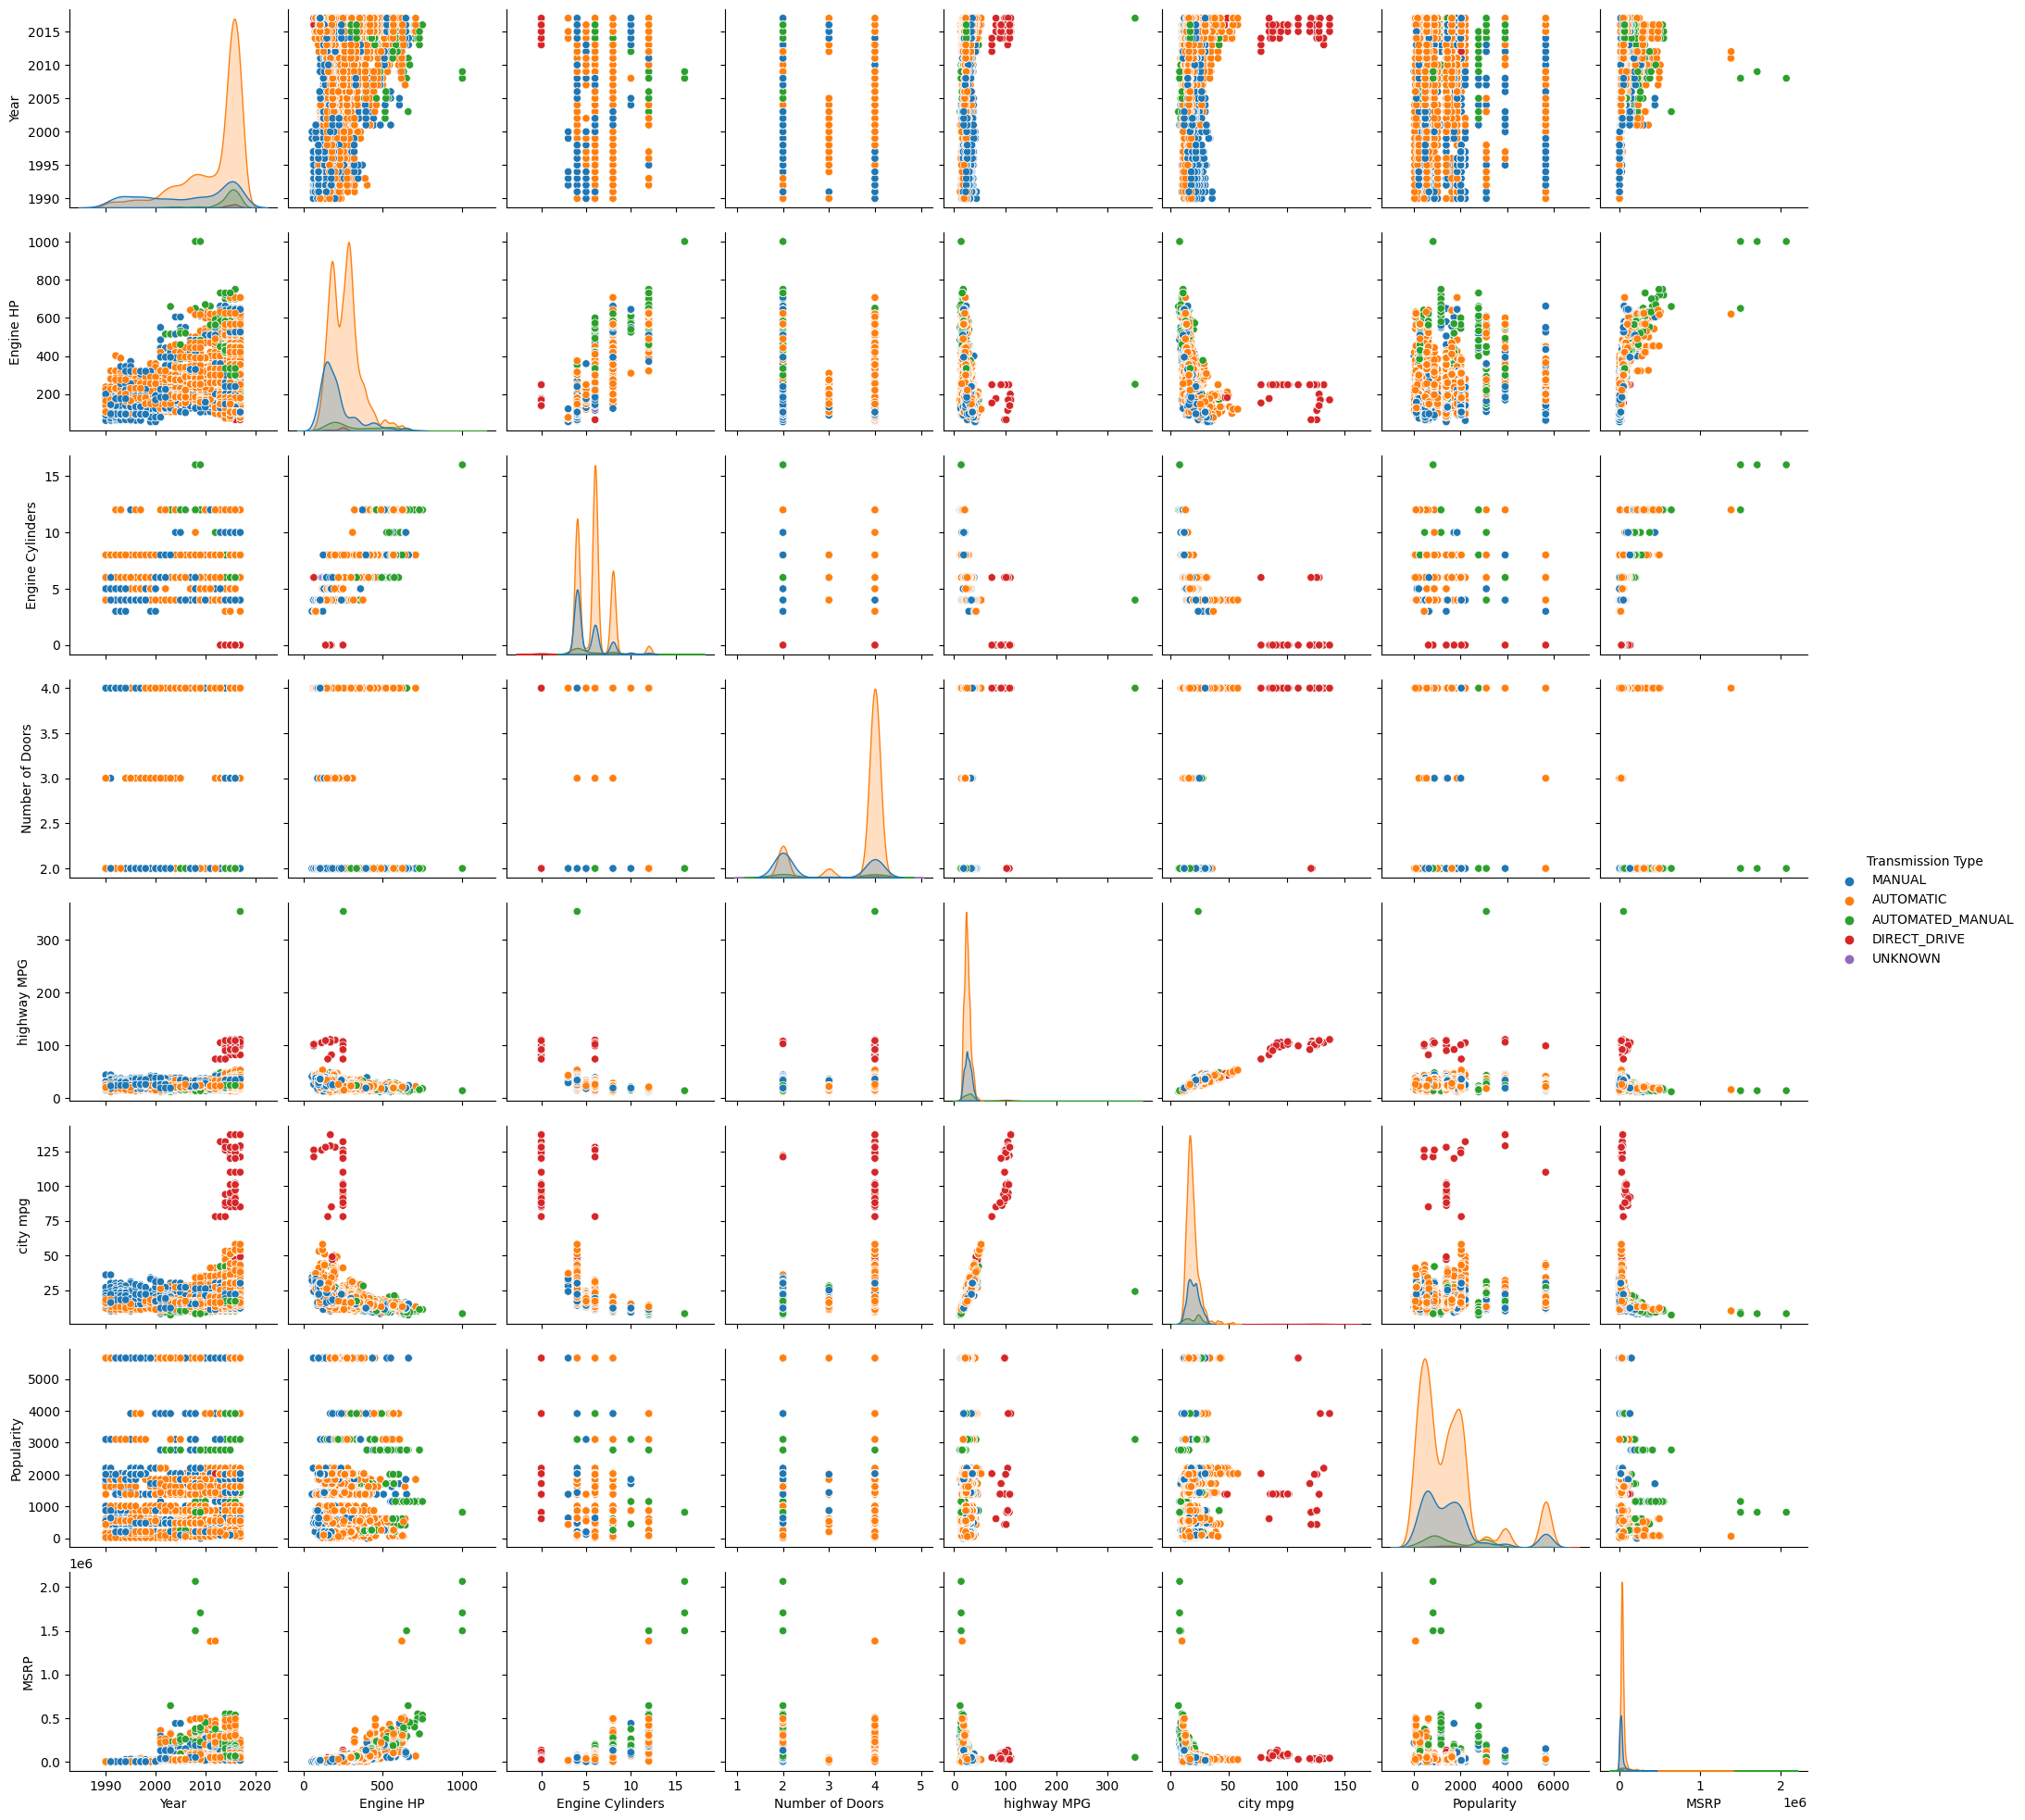

In [15]:
sns.pairplot(data,hue='Transmission Type')

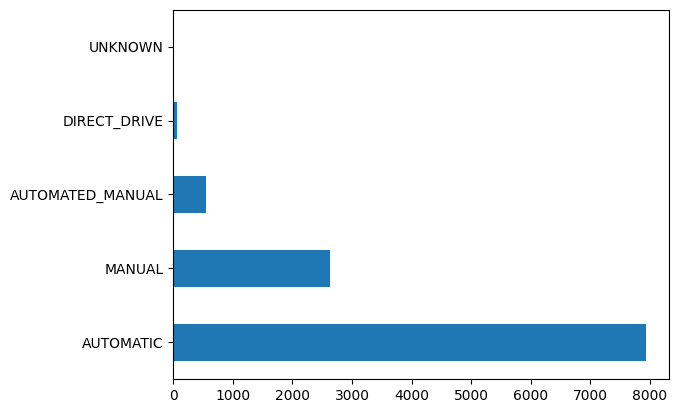

In [16]:
data['Transmission Type'].value_counts().plot(kind='barh')
plt.show()

Most of the vehicles sold are of automatic type

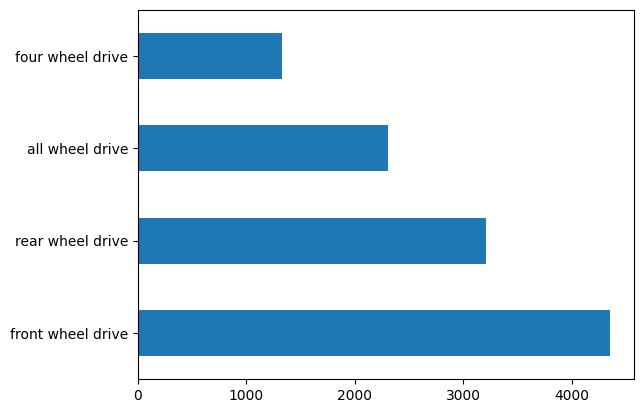

In [17]:
data['Driven_Wheels'].value_counts().plot(kind='barh')
plt.show()

Four wheel drive is the least prefereed and Front wheel drive is the most preffered

Checking the distribution of variuos numerical columns

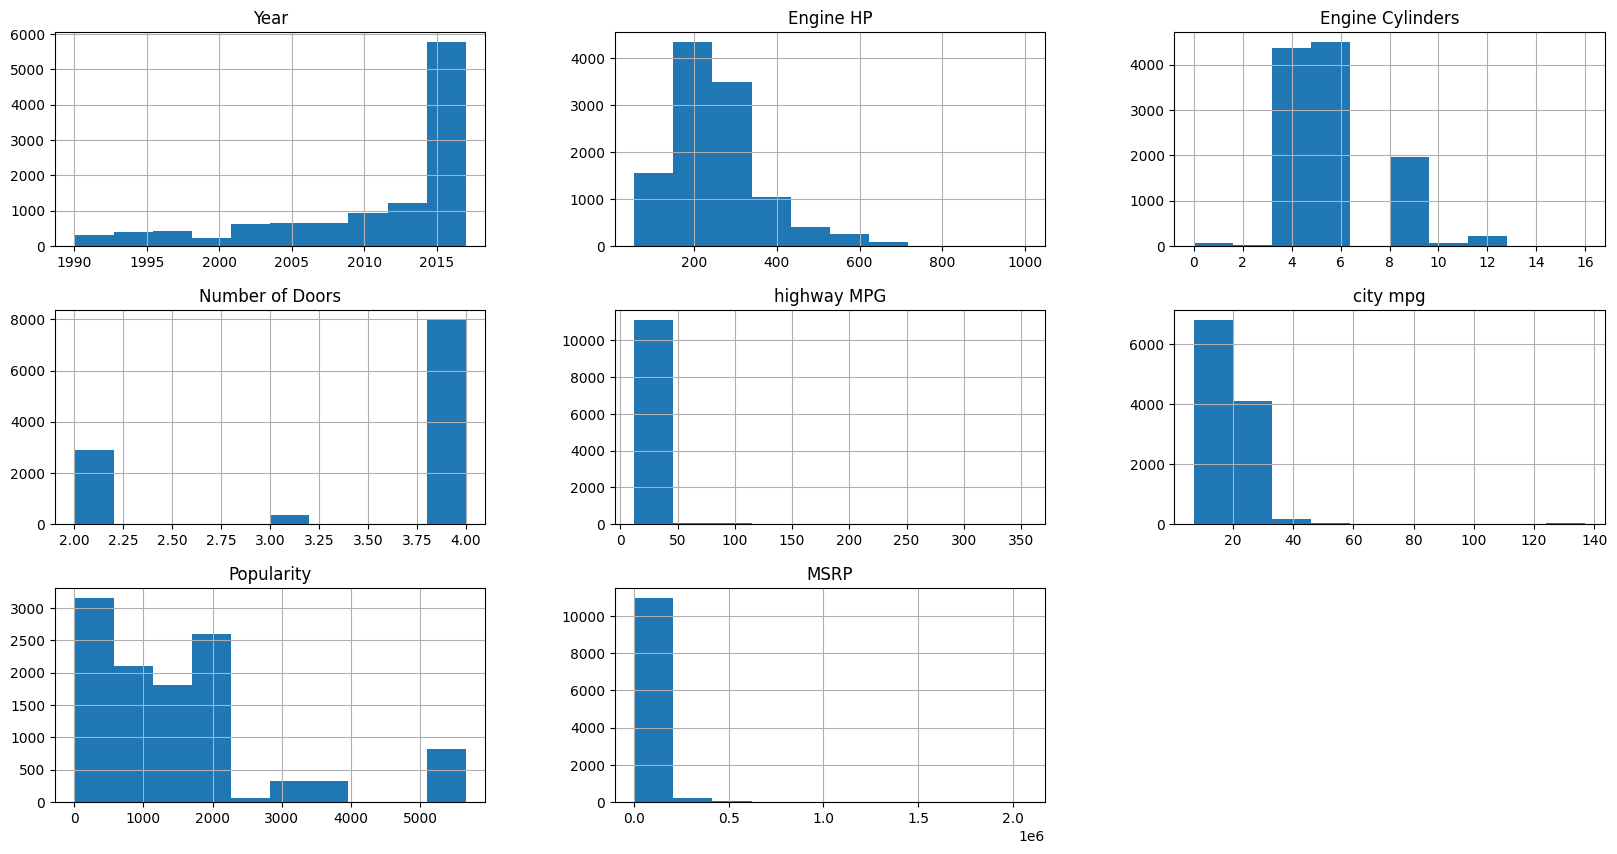

In [18]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,10))
plt.show()

Checking for outliers

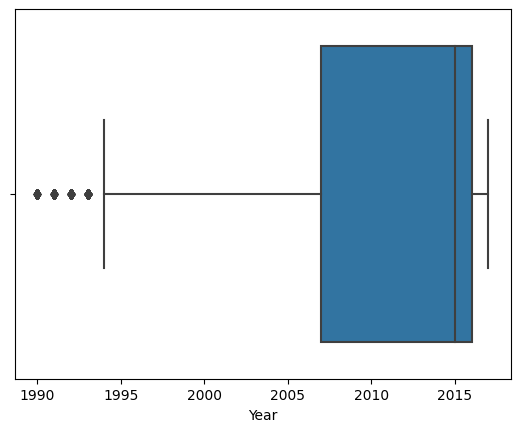

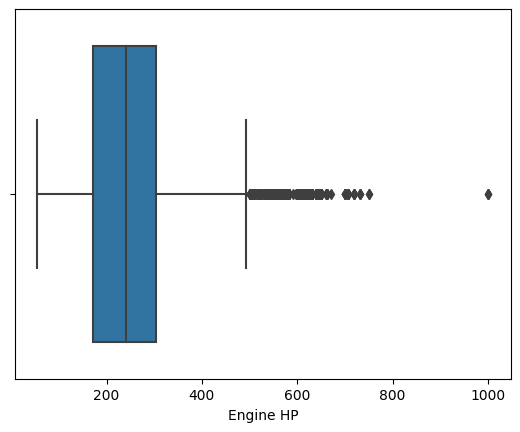

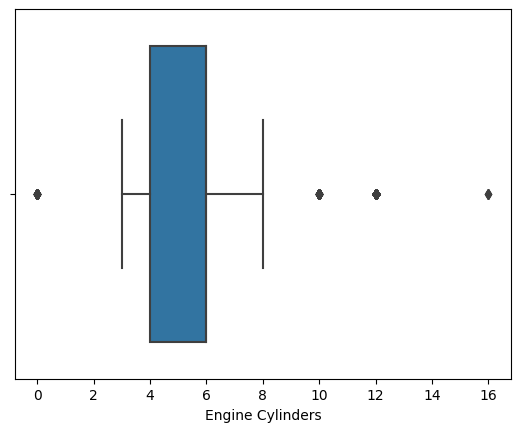

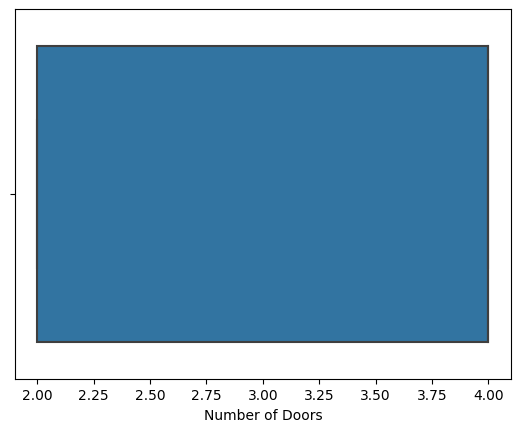

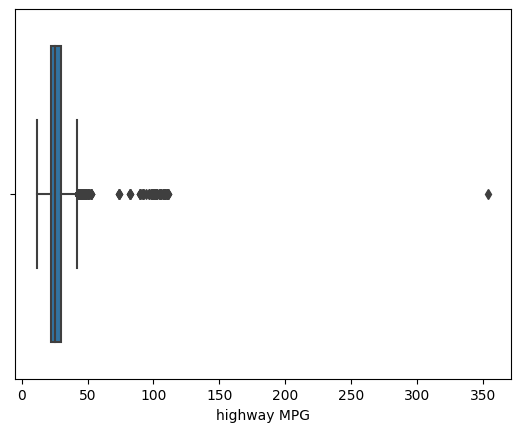

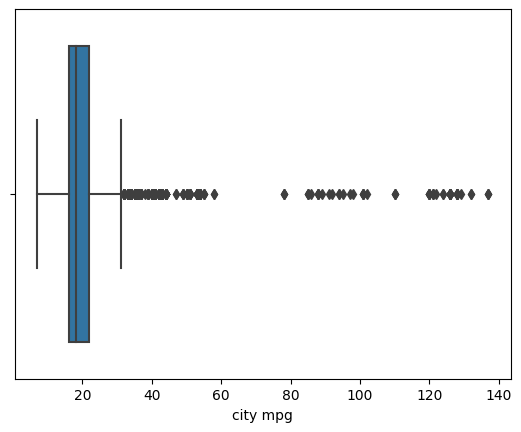

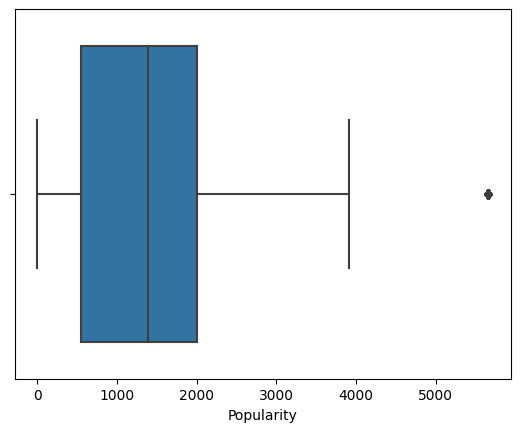

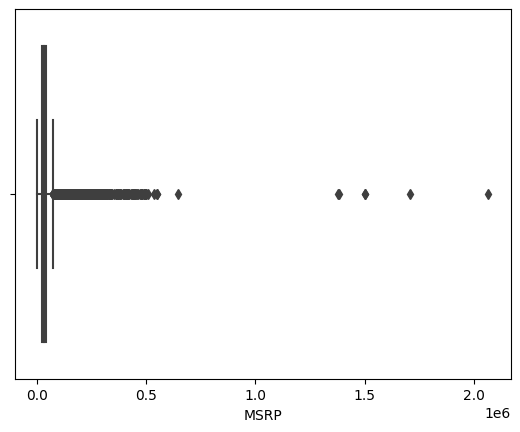

In [19]:
for i in data.select_dtypes(include=['float','int']):
  sns.boxplot(x=data[i])
  plt.show()

We can see that there are many outliers in some of the columns

Replacing the outliers with the median of the values

In [20]:
for i in data.select_dtypes(include=['float','int']):
  IQR =stats.iqr(data[i],interpolation='midpoint')
  IQR
  Q1=data[i].quantile(0.25)
  Q3=data[i].quantile(0.75)
  min_limit=Q1-1.5*IQR
  max_limit=Q3+1.5*IQR
  min_limit,max_limit
  data.loc[data[i]>max_limit,i]=np.median(data[i])
  data.loc[data[i]<min_limit,i]=np.median(data[i])

Finidng corelation between the variables

In [21]:
data.corr()

<ipython-input-21-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.260573,-0.081568,0.206021,0.308247,0.262255,0.171467,0.494003
Engine HP,0.260573,1.000000,0.703805,-0.009453,-0.439546,-0.515056,0.104519,0.659360
Engine Cylinders,-0.081568,0.703805,1.000000,-0.066496,-0.697851,-0.734159,0.043199,0.322235
Number of Doors,0.206021,-0.009453,-0.066496,1.000000,0.112203,0.131680,-0.063528,0.164521
highway MPG,0.308247,-0.439546,-0.697851,0.112203,1.000000,0.900965,0.060792,-0.077877
city mpg,0.262255,-0.515056,-0.734159,0.131680,0.900965,1.000000,0.046239,-0.139151
Popularity,0.171467,0.104519,0.043199,-0.063528,0.060792,0.046239,1.000000,0.098229
MSRP,0.494003,0.659360,0.322235,0.164521,-0.077877,-0.139151,0.098229,1.000000


Plotting the heatmap for correlation

<ipython-input-22-c28990eed9b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

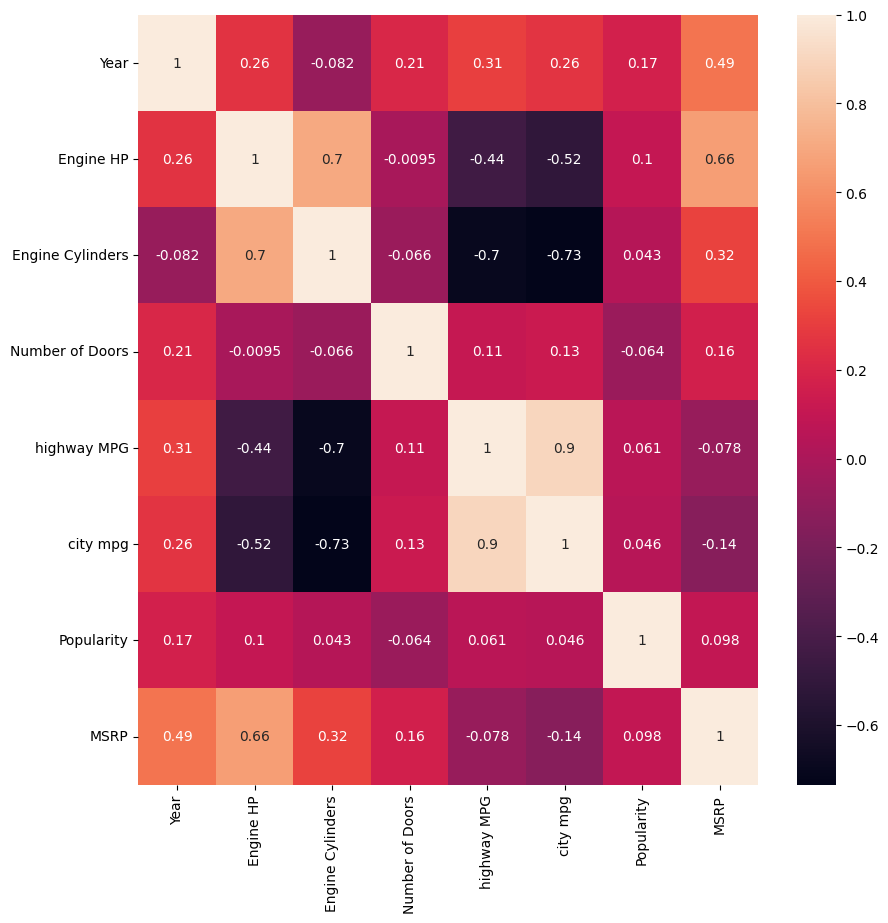

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True)

There is high correlation between city mpg and highway mpg. We can drop one of the columns. Also the popularity value is dependent on the make.

In [23]:
data.drop('city mpg',axis=1,inplace=True)

In [24]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'Popularity', 'MSRP'],
      dtype='object')

Label encoding the object type columns

In [25]:
for i in data.select_dtypes(include ='object'):
  print(i)

Make
Model
Engine Fuel Type
Transmission Type
Driven_Wheels
Market Category
Vehicle Size
Vehicle Style


Label encoding the Make

In [26]:
le1=LabelEncoder()
data['Make']=le1.fit_transform(data['Make'])

Label Encoding the Model

In [27]:
le2=LabelEncoder()
data['Model']=le2.fit_transform(data['Model'])

Label encoding the fuel used

In [28]:
le3=LabelEncoder()
data['Engine Fuel Type']=le3.fit_transform(data['Engine Fuel Type'])

Label encoding the transmission type

In [29]:
le4=LabelEncoder()
data['Transmission Type']=le4.fit_transform(data['Transmission Type'])

Label encoding the number of wheels driven

In [30]:
le5=LabelEncoder()
data['Driven_Wheels']=le5.fit_transform(data['Driven_Wheels'])

Label encoding the Market category

In [31]:
le6=LabelEncoder()
data['Market Category']=le6.fit_transform(data['Market Category'])

Label encoding the Vehicle Size

In [32]:
le7=LabelEncoder()
data['Vehicle Size']=le7.fit_transform(data['Vehicle Size'])

Label encoding the Vehicle style

In [33]:
le8=LabelEncoder()
data['Vehicle Style']=le8.fit_transform(data['Vehicle Style'])

Checling the data after label encoding

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  int64  
 1   Model              11199 non-null  int64  
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  int64  
 4   Engine HP          11199 non-null  float64
 5   Engine Cylinders   11199 non-null  float64
 6   Transmission Type  11199 non-null  int64  
 7   Driven_Wheels      11199 non-null  int64  
 8   Number of Doors    11199 non-null  float64
 9   Market Category    11199 non-null  int64  
 10  Vehicle Size       11199 non-null  int64  
 11  Vehicle Style      11199 non-null  int64  
 12  highway MPG        11199 non-null  int64  
 13  Popularity         11199 non-null  int64  
 14  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.4 MB


All the categorical data has been converted into numerical data

In [35]:
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
Popularity           0
MSRP                 0
dtype: int64

<Axes: >

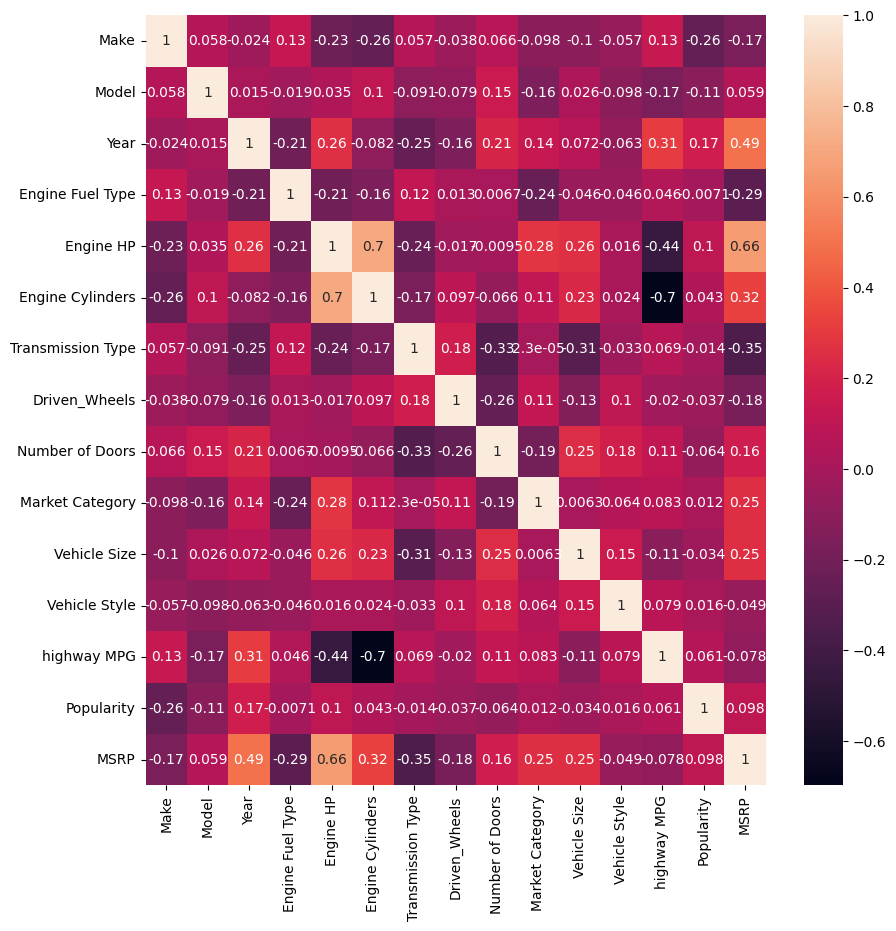

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True)

Spliting the data into train and test. Test size is taken as 25% of the data

In [37]:
x=data.drop(['MSRP'],axis=1)
y=data[['MSRP']]
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

Linear Regression Modeling

In [38]:
value= [LinearRegression(),LogisticRegression(), BaggingRegressor(), DecisionTreeRegressor(),ExtraTreesRegressor(),GradientBoostingRegressor(),HistGradientBoostingRegressor(),RandomForestRegressor()]
key= ['Linear Regression','Logistic Regression', 'Bagging Regression',   'Decision Tree Regression','Extra Trees Regression','Gradient Boosting Regression','Hist Gradient Boosting Regression','Random Forest Regression']

models= dict(zip(key,value))
for key,value in models.items():
    value.fit(x_train,y_train)
    y_pred= value.predict(x_test).round(0)
    print('\n',key)
    print('  Mean square error = ',mean_squared_error(y_test,y_pred))
    print('  R2 Score =',r2_score(y_test,y_pred))


 Linear Regression
  Mean square error =  95215717.8925
  R2 Score = 0.6107595004257848


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel


 Logistic Regression
  Mean square error =  182646180.90785715
  R2 Score = 0.25334501198465764

 Bagging Regression
  Mean square error =  20959597.210714284
  R2 Score = 0.9143174649128453

 Decision Tree Regression
  Mean square error =  25516626.793214284
  R2 Score = 0.8956883928381127


<ipython-input-38-009db5116219>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  value.fit(x_train,y_train)



 Extra Trees Regression
  Mean square error =  24474794.279285714
  R2 Score = 0.8999473893270334


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Gradient Boosting Regression
  Mean square error =  45866521.31714286
  R2 Score = 0.8124983136568638


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Hist Gradient Boosting Regression
  Mean square error =  23506941.15
  R2 Score = 0.9039039591444555


<ipython-input-38-009db5116219>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  value.fit(x_train,y_train)



 Random Forest Regression
  Mean square error =  20746705.130357143
  R2 Score = 0.9151877647073305


The highest scores was  given by Random forest regression with an R2 score of 0.915. Followed by Bagging regressions and Hist gradient boosting, Extra trees.